<a href="https://colab.research.google.com/github/Nibir-Atik/MlLabTask05/blob/main/labTask05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
df = pd.read_csv('/content/drive/MyDrive/Heart/heart.csv')

In [82]:
# Preview shape and column names
print("Dataset loaded successfully.")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

Dataset loaded successfully.
Shape: (1025, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [83]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [84]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [90]:
# Show first few rows
df.head()

df['ca'].value_counts()


df['thal'].value_counts()


df['target'].value_counts()

,count
target,
1,526
0,499


In [86]:
# Drop identifier columns
drop_cols = []

In [87]:
# Create df1 for 'Class' prediction
df1 = df.drop(columns=drop_cols + ['thal', 'target'])
df1 = df1.select_dtypes(include=['int64', 'float64']) # Removed .join(df['ca'])

In [88]:
# Create df2 for 'Category' prediction
df2 = df.drop(columns=drop_cols + ['thal', 'target']) # Changed to drop 'thal' and 'target'
df2 = df2.select_dtypes(include=['int64', 'float64']) # Removed .join(df['Category'])

In [63]:
# Create df3 for 'Family' prediction
df3 = df.drop(columns=drop_cols + ['thal', 'target']) # Changed to drop 'thal' and 'target'
df3 = df3.select_dtypes(include=['int64', 'float64']) # Removed .join(df['Family'])

In [68]:
print("df1, df2, df3 created successfully:")
print("df1 shape (ca):", df1.shape)
print("df2 shape (thal):", df2.shape)
print("df3 shape (target):", df3.shape)


df1, df2, df3 created successfully:
df1 shape (ca): (1025, 12)
df2 shape (thal): (1025, 12)
df3 shape (target): (1025, 12)


In [69]:
#Binary Class Classification

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [70]:
# 1. Feature-label split
X = df1.drop(columns=['ca'])
y = df1['ca']

# 2. Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3. Split and scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Define models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}


In [72]:
# 5. Train, Predict, Evaluate
plt.figure(figsize=(10, 6))
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    # y_prob = model.predict_proba(X_test_scaled)[:, 1] # Removed this line as it's for binary classification

    print(f"\n {name} Metrics:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted')) # Changed average to 'weighted'
    print("Recall   :", recall_score(y_test, y_pred, average='weighted'))    # Changed average to 'weighted'
    print("F1 Score :", f1_score(y_test, y_pred, average='weighted'))      # Changed average to 'weighted'
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # ROC curve - Removed this section as it's for binary classification
    # fpr, tpr, _ = roc_curve(y_test, y_prob)
    # roc_auc = auc(fpr, tpr)
    # plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')


 Decision Tree Metrics:
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0
Confusion Matrix:
 [[116   0   0   0   0]
 [  0  45   0   0   0]
 [  0   0  27   0   0]
 [  0   0   0  14   0]
 [  0   0   0   0   3]]

 KNN Metrics:
Accuracy : 0.6390243902439025
Precision: 0.6533684904416611
Recall   : 0.6390243902439025
F1 Score : 0.63819356012838
Confusion Matrix:
 [[86 23  3  2  2]
 [16 23  5  0  1]
 [ 5  5 17  0  0]
 [ 4  2  5  3  0]
 [ 0  1  0  0  2]]

 Random Forest Metrics:
Accuracy : 0.9804878048780488
Precision: 0.9811382113821138
Recall   : 0.9804878048780488
F1 Score : 0.9790271462036653
Confusion Matrix:
 [[116   0   0   0   0]
 [  0  45   0   0   0]
 [  0   0  27   0   0]
 [  4   0   0  10   0]
 [  0   0   0   0   3]]


<Figure size 1000x600 with 0 Axes>

/tmp/ipython-input-74-2822756773.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


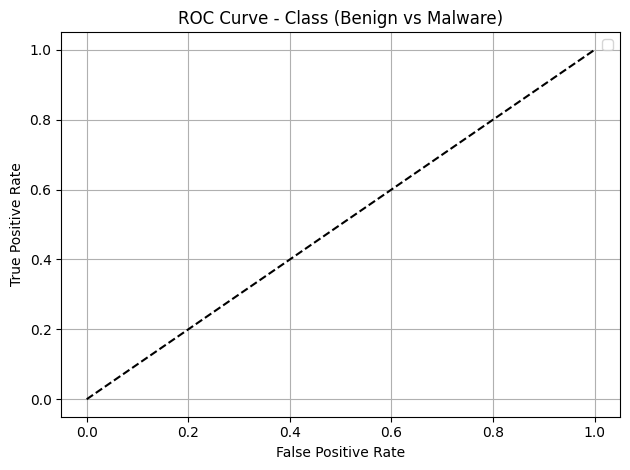

In [74]:
# 6. Plot ROC Curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Class (Benign vs Malware)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#ROC Curve for Binary Class Classification


 Decision Tree Metrics:
Accuracy : 0.9853658536585366
Precision (macro): 0.9933035714285714
Recall (macro)   : 0.9908536585365854
F1 Score (macro) : 0.9919479497484612
Confusion Matrix:
 [[  1   0   0   0]
 [  0  13   0   0]
 [  0   0 109   0]
 [  0   0   3  79]]

 KNN Metrics:
Accuracy : 0.7463414634146341
Precision (macro): 0.7206710386857447
Recall (macro)   : 0.6947475773275729
F1 Score (macro) : 0.7033420172641729
Confusion Matrix:
 [[ 1  0  0  0]
 [ 0  3  3  7]
 [ 0  2 89 18]
 [ 0  3 19 60]]

 Random Forest Metrics:
Accuracy : 0.9853658536585366
Precision (macro): 0.9933035714285714
Recall (macro)   : 0.9908536585365854
F1 Score (macro) : 0.9919479497484612
Confusion Matrix:
 [[  1   0   0   0]
 [  0  13   0   0]
 [  0   0 109   0]
 [  0   0   3  79]]


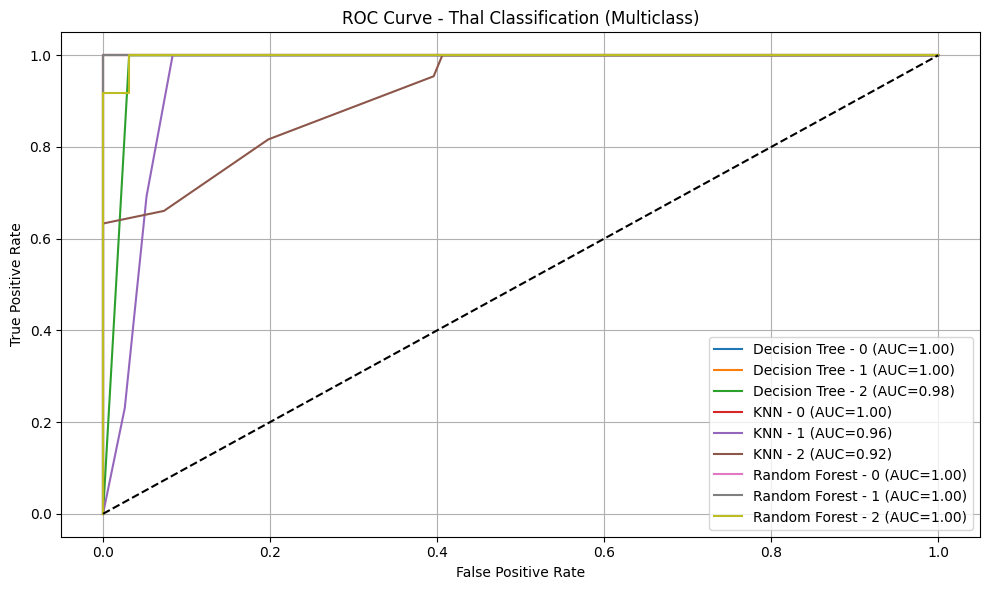

In [77]:
#Multiclass Classification (4 Classes)

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# 1. Feature-label split
X = df.drop(columns=['thal', 'target']) # Use original df and drop thal and target for features
y = df['thal'] # Use thal from original df as target

# 2. Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_

# 3. One-hot encode for ROC-AUC (multiclass)
y_binarized = label_binarize(y_encoded, classes=range(len(class_names)))

# 4. Train-test split + scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# 6. Train and Evaluate
plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)

    print(f"\n {name} Metrics:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
    print("Recall (macro)   :", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score (macro) :", f1_score(y_test, y_pred, average='macro'))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # ROC AUC (macro-average)
    y_test_bin = label_binarize(y_test, classes=range(len(class_names)))
    auc_score = roc_auc_score(y_test_bin, y_prob, average="macro", multi_class="ovr")

    # ROC curve (plot only first 3 classes to avoid clutter)
    for i in range(min(3, len(class_names))):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f'{name} - {class_names[i]} (AUC={auc(fpr, tpr):.2f})')

# 7. Plot ROC Curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Thal Classification (Multiclass)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


 Decision Tree Metrics:
Accuracy : 0.9853658536585366
Precision: 1.0
Recall   : 0.9714285714285714
F1 Score : 0.9855072463768116
Confusion Matrix:
 [[100   0]
 [  3 102]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


 KNN Metrics:
Accuracy : 0.8146341463414634
Precision: 0.8526315789473684
Recall   : 0.7714285714285715
F1 Score : 0.81
Confusion Matrix:
 [[86 14]
 [24 81]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82       100
           1       0.85      0.77      0.81       105

    accuracy                           0.81       205
   macro avg       0.82      0.82      0.81       205
weighted avg       0

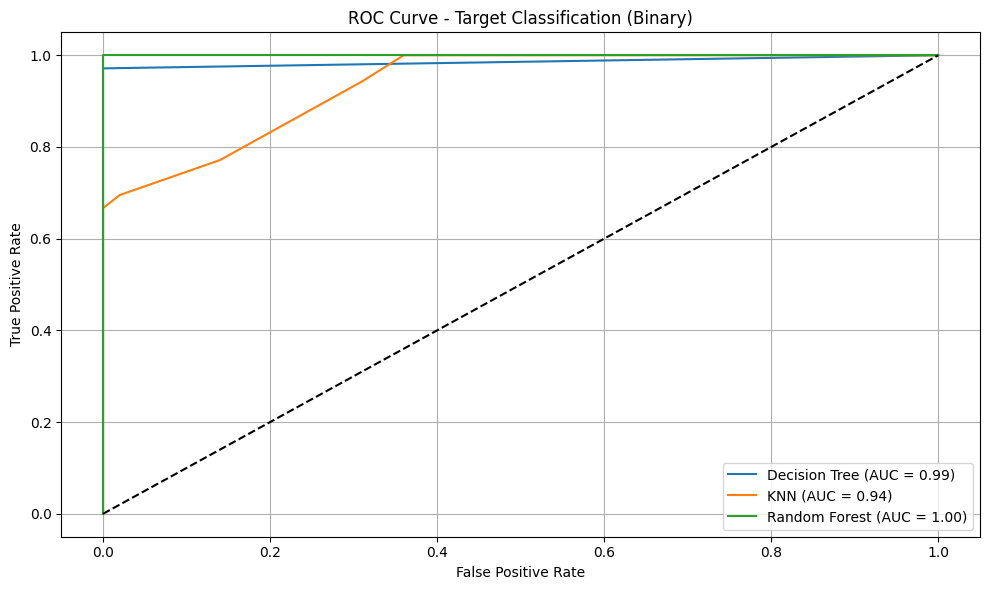

In [81]:
#Binary Classification (Target)

from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# 1. Feature-label split
X = df.drop(columns=['target', 'thal', 'ca']) # Use original df and drop target, thal, and ca for features
y = df['target'] # Use target from original df as target

# 2. Label encode (not strictly necessary for binary, but good practice)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_

# 3. Train-test split + scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# 5. Train and evaluate
plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] # Probability of the positive class

    print(f"\n {name} Metrics:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred)) # Default is binary
    print("Recall   :", recall_score(y_test, y_pred))    # Default is binary
    print("F1 Score :", f1_score(y_test, y_pred))      # Default is binary
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(
        y_test, y_pred, target_names=[str(c) for c in class_names], zero_division=0
    ))

    # ROC Curve for binary classification
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# 6. Plot ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Target Classification (Binary)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()